# Phase 2 Milestone 2

# A. Introduction

by Handoko Pramulyo | Batch : FTDS-014

Context in this case : This dataset (FinancialPhraseBank) contains the sentiments for financial news headlines from the perspective of a retail investor. The dataset contains two columns, "Sentiment" and "News Headline". The sentiment can be negative, neutral or positive. Dataset ini di dapatkan dari Kaggle, dataset yang digunakan untuk membuat model NLP dari headline berita dengan topik finance. Dataset ini sangat menarik untuk ditelusuri lebih dalam untuk melihat sentiment financial secara umum (which is good for CEO and Director to loop up more global condition during daily operational).

First of all, I would like to give my acknowledgements to the owner of the data : Malo, P., Sinha, A., Korhonen, P., Wallenius, J., & Takala, P. (2014). Good debt or bad debt: Detecting semantic orientations in economic texts. Journal of the Association for Information Science and Technology, 65(4), 782-796.

Source of data : https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news

Deployment app link : https://front-fin-hans.herokuapp.com

Objective : `Membuat model sentiment dgn NLP pada dataset` **Sentiment Analysis for Financial News**

# B. Library

Pada case Machine Learning ini, library yang akan digunakan adalah scikit-learn & tensorflow (Machine Learning library in Python), library yang dedicated dibuat untuk Machine Learning & ANN. Simple and efficient tools for predictive data analysis, Accessible to everybody, and reusable in various contexts, Built on NumPy, SciPy, and matplotlib, Open source, dan sekaligus commercially usable. OK, lets proceed to the next part.

In [1]:
# basic Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

# Text Preprocessing
import re # Text Preprocessing
import nltk # Text Preprocessing
import string # Menghilangkan Tanda Baca Punc
from nltk.corpus import stopwords # Menghilangkan Stopwords
from nltk.tokenize import sent_tokenize, word_tokenize # Using Stopwords
from nltk.stem import PorterStemmer # Stemming with nltk
from nltk.stem.wordnet import WordNetLemmatizer

# Libraray wordcloud
from configparser import Interpolation
from wordcloud import WordCloud

# Library from sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Library from tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import TextVectorization, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, Input, LSTM, GRU

# Library for saving & loading
import pickle
import joblib

# Remove future warning
import warnings
warnings.filterwarnings('ignore')

# Define plot style
plt.style.use('ggplot')
# Disable warning


# C. Data Loading

Pada bagian ini, kita akan coba isi dengan proses penyiapan data (pd read) sebelum dilakukan eksplorasi data lebih lanjut (atau yang biasa disebut dengan EDA). Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom (opsional), melihat gambaran umum dari data, mengecek ukuran dataset, dll.

In [2]:
# Load Dataset 
data_master = pd.read_csv('https://gist.githubusercontent.com/handokopramulyo/1ca81f347e6ed516b3c4c9c948448581/raw/20c2c1fc35156d4422ef58a24505ce7cde019323/finance_headline.csv', encoding='ISO-8859-1') # Read CSV file
# data = pd.read_excel('filename.xlsx', index_col=None, header=None) # # Read Excel file
data_master.head(10)

,sentiment,headline
0,neutral,"According to Gran, the company has no plans to..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company updated strategy for ...
5,positive,FINANCING OF ASPOCOMP GROWTH Aspocomp is aggre...
6,positive,"For the last quarter of 2010, Componenta net s..."
7,positive,"In the third quarter of 2010, net sales increa..."
8,positive,Operating profit rose to EUR 13.1 mn from EUR ...
9,positive,"Operating profit totalled EUR 21.1 mn, up from..."


In [3]:
data_master.tail(10)

,sentiment,headline
4835,negative,"Operating profits in the half were0.8 m, down ..."
4836,negative,"Sales in Finland decreased by 2.0 %, and inter..."
4837,negative,The company said that its comparable operating...
4838,negative,Operating result for the 12month period decrea...
4839,negative,HELSINKI Thomson Financial Shares in Cargotec ...
4840,negative,LONDON MarketWatch Share prices ended lower in...
4841,neutral,Rinkuskiai beer sales fell by 6.5 per cent to ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...
4844,negative,Sales in Finland decreased by 10.5 % in Januar...


Data observasi OKE (lebih dari 50 jumlah observasi --> based on sclearn recommendation) dengan jumlah feature yang proporsional, maka yang bisa kita artikan bahwa model yang akan dibuat 'most likely' low possibility untuk overfit (due to low variance which is good. ```Additional conclusion based on least square``` Jennifer Zhao in medium.com).

In [4]:
# Duplicate Dataset
data_copy = data_master.copy()
label_name = 'sentiment'
# Check Dataset
# looking up for missing value
data_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4845 non-null   object
 1   headline   4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


**Dataset terdiri dari int, float dan object.** Untuk sementara, no nulled data found just yet! Let's see a little bit deeper for each unique data. Objective: mempelajari kesesuaian antara tipe data dan data yang terdapat pada kolom tersebut (menghindari data int yang tersimpan as string, vise versa, dll) 

# D. Text preprocessing

Pada case NLP ini, preprocessing data akan dilakukan sebelum EDA. Bagian ini dilakukan lebih awal agar proses EDA bisa dilakukan dengan proporsional sekaligus memiliki makna yang bisa diinterpretasikan secara bahasa yang baik dan benar. Adapun beberapa hal yang akan dilakukan di antaranya adalah setting headline to lowercase, removing strip, removing punc, tanda baca yang tidak esensi, angka pada setiap headline, serta text preprocessing lainnya).

## D1. Text preprocessing sample

In [5]:
# Memilih sample headline pada row tertentu
text = data_master.headline[192]
print("Original Text:", text)

Original Text: Finnish cutlery and hand tools maker Fiskars Oyj Abp HEL : FISAS said today its net profit rose to EUR 24.1 million USD 33.6 m in the third quarter of 2010 from EUR 17.9 million a year earlier.


Untuk case saat ini, setiap headline akan diubah ke dalam lower case (meskipun ada beberapa kata seperti Financing yang mempunyai dua arti dalam vocab di all headline ini, seperti Financing untuk nama company dan financing untuk financial itu sendiri), karena jumlah kata financing as company tidak banyak, maka semua kata akan kita set as lower case. Strip akan dihapus, semua angka akan dihapus, serta link dan punctuation juga akan dihapus.

In [6]:
# Case Folding
text = text.lower()
text = text.strip()
text = re.sub(r"http\S+", " ", text) #Menghilangkan link
text = re.sub(r"www.\S+", " ", text) #Menghilangkan link
text = re.sub("[^A-Za-z\s']"," ", text) #Menghilangkan yang bukan huruf
text = text.translate(str.maketrans("","", string.punctuation))
print("Text regex ======= :", text)
print('-'*20)
# Sentence Tokenization
sent_token = sent_tokenize(text)
print("Sent Token ======= :", sent_token)
print('-'*20)
# Word Tokenization
word_token = word_tokenize(text)
print("Tokenized Sentence ======= :", word_token)

Text regex ======= : finnish cutlery and hand tools maker fiskars oyj abp hel   fisas said today its net profit rose to eur      million usd      m in the third quarter of      from eur      million a year earlier 
--------------------
Sent Token ======= : ['finnish cutlery and hand tools maker fiskars oyj abp hel   fisas said today its net profit rose to eur      million usd      m in the third quarter of      from eur      million a year earlier']
--------------------
Tokenized Sentence ======= : ['finnish', 'cutlery', 'and', 'hand', 'tools', 'maker', 'fiskars', 'oyj', 'abp', 'hel', 'fisas', 'said', 'today', 'its', 'net', 'profit', 'rose', 'to', 'eur', 'million', 'usd', 'm', 'in', 'the', 'third', 'quarter', 'of', 'from', 'eur', 'million', 'a', 'year', 'earlier']


Dari hasil Tokenized Sentence, masih terlihat beberapa vocab non esensi seperti finnish (nama negera, finland), and, fiskars (name of someone), oyj, dll. Oleh karena itu, stopword akan digunakan untuk menghilangkan kata-kata pembangun bahasa, dan ada beberapa tambahan seperti mata uang euro, singkatan jumlah uang milion, serta singkatan lain yang tidak memiliki makna pada konteks kata pada headline.

In [7]:
# stopwords
stop_words = list(set(stopwords.words('english')))
stop_words = stop_words + ['eur', 'mn', 'mln', 'oyj', 'abp', 'euro', 'usd', 'oy', 'helsinki', 
                            'pct', 'hel', 'first', 'second', 'fisas'] # Add more stopword
sent_filtered = []

# for loop removing word, defined by stopwords
for w in word_token:
    if w not in stop_words:
        sent_filtered.append(w)
        
# print sent_filtered
print("Filterd Sentence ======= :", sent_filtered)

# Lexicon Normalization & Stemming
ps = PorterStemmer()
stemmed_words = []
for w in sent_filtered:
    stemmed_words.append(ps.stem(w))

print("Stemmed Sentence ======= :", stemmed_words)


# Performing stemming and Lemmatization
lem = WordNetLemmatizer()
lemmatized_words = []

for w in sent_filtered:
    lemmatized_words.append(lem.lemmatize(w))
    
print("Lemmatized Sentence ======= :", lemmatized_words)

Filterd Sentence ======= : ['finnish', 'cutlery', 'hand', 'tools', 'maker', 'fiskars', 'said', 'today', 'net', 'profit', 'rose', 'million', 'third', 'quarter', 'million', 'year', 'earlier']
Stemmed Sentence ======= : ['finnish', 'cutleri', 'hand', 'tool', 'maker', 'fiskar', 'said', 'today', 'net', 'profit', 'rose', 'million', 'third', 'quarter', 'million', 'year', 'earlier']
Lemmatized Sentence ======= : ['finnish', 'cutlery', 'hand', 'tool', 'maker', 'fiskars', 'said', 'today', 'net', 'profit', 'rose', 'million', 'third', 'quarter', 'million', 'year', 'earlier']


Bagian D1 sudah kita lakukan untuk beberapa kali perulangan dengan beberapa sampel yang berbeda sehingga diperoleh text preprocessing yang maksimal. Adapun preprocessing lain seperti stemming tidak dilakukan karena ber-efek improper pada vocab yang sudah dibentuk, seperti company menjadi compani, dll.

## D2. Text Preprocessing all headline

In [8]:
# Membuat Function text preprocessing dari hasil evaluasi di atas (D1)
# --> untuk dapat diterapkan pada DataFrame

def text_proses(teks):
    teks = teks.lower() # small case font
    teks = teks.strip() # remove space
    teks = re.sub(r"http\S+", " ", teks) # Menghilangkan link
    teks = re.sub(r"www.\S+", " ", teks) # Menghilangkan link
    teks = re.sub("[^A-Za-z\s']"," ", teks) # Menghilangkan yang bukan huruf
    tokens = word_tokenize(teks) # Define tokens
    stop_words = list(set(stopwords.words('english'))) # Set stopword dalam bahasa inggris
    stop_words = stop_words + ['eur', 'mn', 'mln', 'oyj', 'abp', 'euro', 'usd', 'oy', 'helsinki', 
                                'pct', 'hel', 'first', 'second', 'fisas'] # Add more stopword
    teks = ' '.join([word for word in tokens if word not in stop_words]) # stopword if condition
    tokens = word_tokenize(teks) # Define tokens
    # teks = ' '.join([ps.stem(word) for word in tokens]) # stem if condition
    teks = ' '.join([lem.lemmatize(word) for word in tokens]) # lem if condition
    return teks

# Define text process dengan lambda
Text_process = lambda x: text_proses(x)

In [9]:
# Mengaplikasikan Semua Teknik Preprocessing ke dalam Semua Documents
data_master['headline_processed'] = data_master['headline'].apply(lambda x: text_proses(x))
data_master.head(10)

,sentiment,headline,headline_processed
0,neutral,"According to Gran, the company has no plans to...",according gran company plan move production ru...
1,neutral,Technopolis plans to develop in stages an area...,technopolis plan develop stage area le square ...
2,negative,The international electronic industry company ...,international electronic industry company elco...
3,positive,With the new production plant the company woul...,new production plant company would increase ca...
4,positive,According to the company updated strategy for ...,according company updated strategy year baswar...
5,positive,FINANCING OF ASPOCOMP GROWTH Aspocomp is aggre...,financing aspocomp growth aspocomp aggressivel...
6,positive,"For the last quarter of 2010, Componenta net s...",last quarter componenta net sale doubled perio...
7,positive,"In the third quarter of 2010, net sales increa...",third quarter net sale increased operating profit
8,positive,Operating profit rose to EUR 13.1 mn from EUR ...,operating profit rose corresponding period rep...
9,positive,"Operating profit totalled EUR 21.1 mn, up from...",operating profit totalled representing net sale


Overall, headline after text preprocessing looks fine.

# E. Exploratory Data Analysis (EDA)

Bagian ini berisi eksplorasi text headline pada dataset yang sudah kita preprocessing menggunakan query, grouping, dan visualisasi sederhana dll sehingga gambaran dari dataset secara umum dapat diambil insight-nya (lets find out something interesting within the data).

## E1. Sentiment class

In [10]:
# Create copy for dataframe
data_eda = data_master.copy()

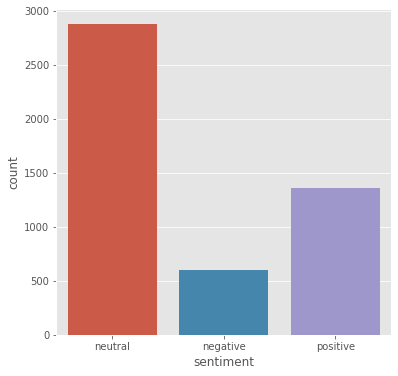

In [11]:
# Plot category data
plt.figure(figsize=(6,6))
sns.countplot(data_eda.sentiment)
plt.show()

Dari hasil plot kolom sentiment, maka dapat dilihat bahwa data imbalance. Jumlah headline dengan value nuetral jauh lebih banyak jika dibandingkan dengan sentiment negative dan positive. Hal ini memang sering terjadi karena dataset yang digunakan berasal dari headline berita yang cenderung (secara natural) harus bersifat neutral dan tidak memprovokasi pihak manapun. Oleh karena itu, proses pembobotan pada each headline pada model definision perlu dilakukan adjutment lebih lanjut sehingga sentiment dengan jumlah data yang sedikit tidak undersampling dan dalam waktu yang sama model dapat menyesuaikan computasi-nya untuk lebih fokus belajar pada data tersebut jika dibandingkan dengan data headline neutral yang jumlahnya lebih banyak.

## E2. Headline Analysis

Pada bagian ini, kita akan melihat visualisasi vocab terbanyak yang muncul pada headline.

In [12]:
# Define corpus from processed text
corpus = data_eda.headline_processed

# Collect the Vocabularies using CountVectorizer()
count_vect = CountVectorizer()
count_vect.fit(corpus)

# See Vocabularies
count_vect.get_feature_names_out()

array(['aaland', 'aalborg', 'aalto', ..., 'zoo', 'zte', 'zu'],
      dtype=object)

In [13]:
# Transform from Corpus into Numerical Vector
corpus_count_vect = count_vect.transform(corpus)
corpus_count_vect

<4845x8498 sparse matrix of type '<class 'numpy.int64'>'
	with 51564 stored elements in Compressed Sparse Row format>

In [14]:
# See corpus_vect as Dense Matrix
corpus_count_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
# See corpus_vect with Their Token's Name
data_eda_vect = pd.DataFrame(corpus_count_vect.toarray(), columns = count_vect.get_feature_names_out())
data_eda_vect = data_eda_vect.drop(columns=['sentiment'])
# Add sentiment columns with concat
data_eda_vect = pd.concat([data_eda_vect, data_eda['sentiment']], axis=1)
data_eda_vect.head()

,aaland,aalborg,aalto,aaltonen,aaron,aava,aazhang,ab,abb,abbott,...,zinc,zinclead,zip,zloty,zoltan,zone,zoo,zte,zu,sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,neutral
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive


In [16]:
# Grouping most frequent word by sentiment
df_grouped = data_eda_vect.groupby(by="sentiment").sum().T
# Create new columns for sum
df_grouped['sum'] = df_grouped.sum(axis=1)
# Sort the most frequent word
df_grouped_sort = df_grouped.sort_values(by=['sum'], ascending=False)
df_grouped_sort

sentiment,negative,neutral,positive,sum
company,108,592,272,972
said,77,238,230,545
finnish,99,215,198,512
sale,102,195,204,501
million,78,193,171,442
...,...,...,...,...
kardzhali,0,0,1,1
karczewicz,0,1,0,1
karara,0,1,0,1
karachi,0,1,0,1


In [17]:
df_grouped_sort_topx = df_grouped_sort.head(20).drop(columns=['sum'])
df_grouped_sort_topx.head()

sentiment,negative,neutral,positive
company,108,592,272
said,77,238,230
finnish,99,215,198
sale,102,195,204
million,78,193,171


<AxesSubplot:>

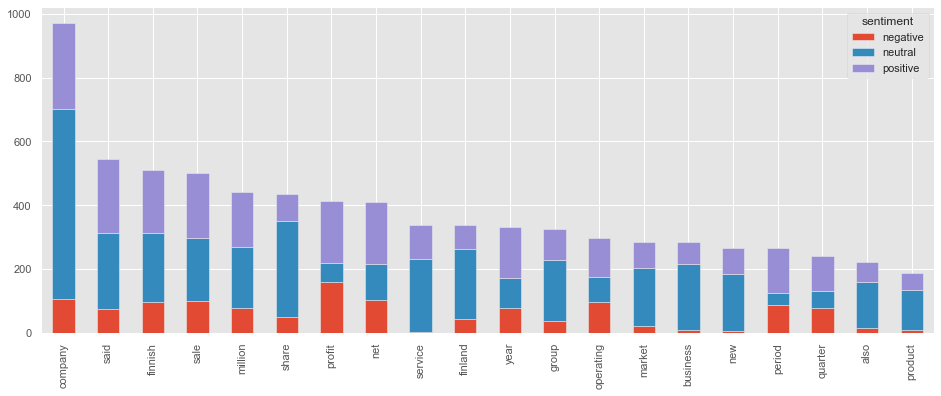

In [18]:
#set seaborn plotting aesthetics
sns.set(style='white')
plt.style.use('ggplot')
#create stacked bar chart
df_grouped_sort_topx.plot(figsize=(16,6), kind='bar', stacked=True)

Dari visualisasi di atas, maka dapat dilihat top 5 dari kata terbanyak adalah company, said, finnish (nama lain dari finland), sale, dan million. Artinya, sebagian besar headline membahas company secara berulang-ulang, atau me-refer-to sebuah perusahaan dan melakukan pembahasan pada performa dari perusahaan tersebut, apakah itu sales-nya, profit-nya, dll. Most case pada headline ini berlokasi di finnish atau sama dengan finland, dan di lokasi tersebut memiliki sentiment positive terbanyak pada kata company, said, sale, profit, dan net. Artinya kondisi company di lokasi tersebut cenderung sentiment positive terhadap beberapa overall kondisi ekonomi dan financial di waktu hedline ini tercacat. Dari sisi jurnalis melihat bahwa orang-orang sudah mulai optimis melihat ekonomi menjadi lebih baik jika dibandingkan dengan overall sentiment negative.

## E3. Headline Analysis with Word CLoud

Pada bagian ini, Word Cloud akan digunakan untuk menunjukkan visualisasi vocab terbanyak yang muncul pada headline. Word cloud sendiri dari beberapa sumber seperti betterevaluasion.com adalah "visual representations of words that give greater prominence to words that appear more frequently"

In [19]:
# Define dataframe only with row correlated with specific value in sentiment
data_eda_vect_negative = data_eda_vect.loc[data_eda_vect['sentiment'].isin(['negative'])].drop(columns='sentiment')
data_eda_vect_neutral = data_eda_vect.loc[data_eda_vect['sentiment'].isin(['neutral'])].drop(columns='sentiment')
data_eda_vect_positive = data_eda_vect.loc[data_eda_vect['sentiment'].isin(['positive'])].drop(columns='sentiment')
data_eda_vect_positive.head()

,aaland,aalborg,aalto,aaltonen,aaron,aava,aazhang,ab,abb,abbott,...,zgody,zinc,zinclead,zip,zloty,zoltan,zone,zoo,zte,zu
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Create dictionary for each sentiment corpus_vect sum()
data_eda_vect_negative_dict = dict(zip(list(data_eda_vect_negative.columns), list(data_eda_vect_negative.sum())))
data_eda_vect_neutral_dict = dict(zip(list(data_eda_vect_neutral.columns), list(data_eda_vect_neutral.sum())))
data_eda_vect_positive_dict = dict(zip(list(data_eda_vect_positive.columns), list(data_eda_vect_positive.sum())))

Text(0.5, 1.0, 'Positive Words (image 03)')

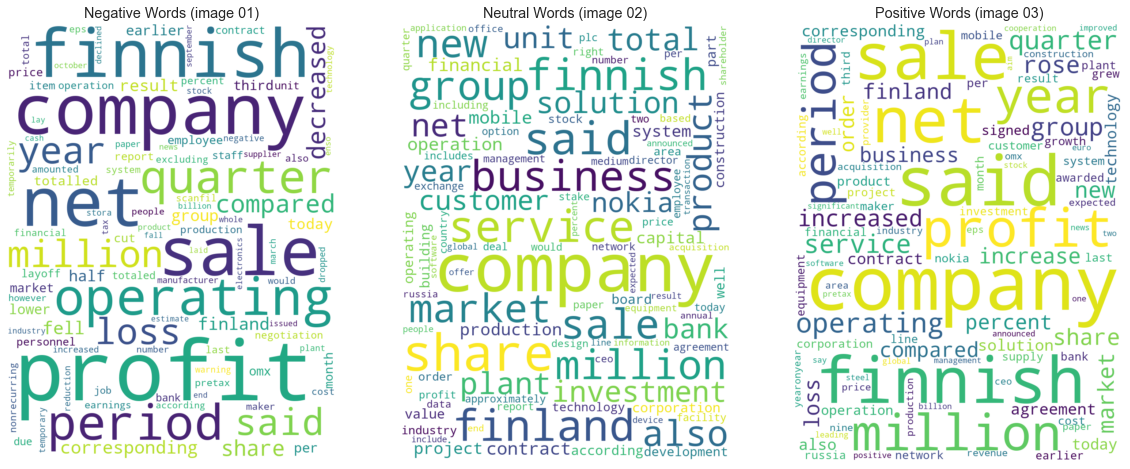

In [21]:
# Create plot with WordCloud
fig, ax = plt.subplots(ncols = 3, figsize = (20,10))

wordcloud_image_negative = WordCloud(width=900, height=1200, max_words=100, background_color='white').generate_from_frequencies(data_eda_vect_negative_dict)
ax[0].imshow(wordcloud_image_negative, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title('Negative Words (image 01)')

wordcloud_image_neutral = WordCloud(width=900, height=1200, max_words=100, background_color='white').generate_from_frequencies(data_eda_vect_neutral_dict)
ax[1].imshow(wordcloud_image_neutral, interpolation='bilinear')
ax[1].axis('off')
ax[1].set_title('Neutral Words (image 02)')

wordcloud_image_positive = WordCloud(width=900, height=1200, max_words=100, background_color='white').generate_from_frequencies(data_eda_vect_positive_dict)
ax[2].imshow(wordcloud_image_positive, interpolation='bilinear')
ax[2].axis('off')
ax[2].set_title('Positive Words (image 03)')

Untuk melihat visualisasi yang lebih menarik, maka word cloud berhasil dibuat. Tampak pada gambar di atas, Negative words (image 01) dengan font terbesar adalah profits, company, sale, net, finnish dll. Kata-kata ini dapat kita interpretasikan bahwa jurnalis pembuat headline melihat kondisi negara di finnish (finland) berkecenderungan sentiment negative pada Profit overall company, sales, dll. Namun overall, topic netral jauh lebih banyak disusul dengan positive sentiment. Proses interpretasi untuk image 2 dan 3 pun bisa dilakukan dengan pola cara membaca yg sama.

# E. Data Preparation

Bagian ini berisi proses persiapan data utama dan inference, mengubah format target untuk menyesuaikan dengan model, splitting feature dan target, process vectorization, embedding, dll.

## E1. Creating Train_Val_Test & Inference Data

In [22]:
data_master

,sentiment,headline,headline_processed
0,neutral,"According to Gran, the company has no plans to...",according gran company plan move production ru...
1,neutral,Technopolis plans to develop in stages an area...,technopolis plan develop stage area le square ...
2,negative,The international electronic industry company ...,international electronic industry company elco...
3,positive,With the new production plant the company woul...,new production plant company would increase ca...
4,positive,According to the company updated strategy for ...,according company updated strategy year baswar...
...,...,...,...
4840,negative,LONDON MarketWatch Share prices ended lower in...,london marketwatch share price ended lower lon...
4841,neutral,Rinkuskiai beer sales fell by 6.5 per cent to ...,rinkuskiai beer sale fell per cent million lit...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...,operating profit fell including vessel sale gain
4843,negative,Net sales of the Paper segment decreased to EU...,net sale paper segment decreased quarter quart...


In [23]:
# Membuat dataset inference dari dataset master, 10 tuk define jumlah observasi inference
# Random_state untuk define formula pemilihan data secara random yet wont change
# data_master_clean = data_master.drop(columns=['headline'])
data_inf = data_master.sample(10, random_state=7)
# Membuat dataset train dan test (exlude inference)
data = data_master.drop(data_inf.index)
data.reset_index(drop=True, inplace=True) 
data_inf.reset_index(drop=True, inplace=True)

In [24]:
# Show data
data = data.drop(columns=['headline'])
data.head()

,sentiment,headline_processed
0,neutral,according gran company plan move production ru...
1,neutral,technopolis plan develop stage area le square ...
2,negative,international electronic industry company elco...
3,positive,new production plant company would increase ca...
4,positive,according company updated strategy year baswar...


In [25]:
# Inference dataset is ready! akan digukan untuk melihat nilai rating (scheme rating unknown)
data_inf = data_inf.drop(columns=['headline_processed'])
data_inf.head()

,sentiment,headline
0,neutral,Rimi supermarket is the key customer in Magist...
1,positive,The representative body of Swedish Meats appro...
2,neutral,Finnish investment group Neomarkka Oyj HEL : N...
3,positive,The company reports a loss for the period of E...
4,positive,Metso said it has won an order worth around 40...


Oke, now we have 2 datasets, which is Train_Val_Test & Inference (we pick 10 observation data), ***each index has been reset!***

## E2. Coverting Target

Untuk memudahkan process model ANN dalam proses train dll, maka label akan kita konversi ke dalam numerical value.

In [26]:
# Melihat Target Corpus
data.sentiment.unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [27]:
# Mengubah Target Corpus dari String ke dalam Numeric
data['label'] = data['sentiment'].replace({'negative' : 0, 'neutral' : 1, 'positive' : 2})
data

,sentiment,headline_processed,label
0,neutral,according gran company plan move production ru...,1
1,neutral,technopolis plan develop stage area le square ...,1
2,negative,international electronic industry company elco...,0
3,positive,new production plant company would increase ca...,2
4,positive,according company updated strategy year baswar...,2
...,...,...,...
4830,negative,london marketwatch share price ended lower lon...,0
4831,neutral,rinkuskiai beer sale fell per cent million lit...,1
4832,negative,operating profit fell including vessel sale gain,0
4833,negative,net sale paper segment decreased quarter quart...,0


In [28]:
# Melihat Persebaran Target
data['label'].value_counts()

1    2872
2    1359
0     604
Name: label, dtype: int64

Semua label berhasil dikonversi ke dalam numerical value.

## E3. Splitting between `X` (Features) and `y` (Target)

Data Split yang optimal dari data train dan test sebetulnya memang bergantung pada byk faktor seperti the use of case (each case of data might be approached differently), the structure of the model, dimension of the data, etc. Namun secara umum, mendefinisikan train data sebesar 80% dan test data sebesar 20% adalah permulaan pembuatan model yang baik (Pragati Baheti from Microsoft, v7labs.com).

In [29]:
# Split between X (Features) and y (Target/label/goal)
X = data.drop(['sentiment', 'label'], axis=1) 
y = data['label']

# Split between Train-Set and Test-Set
# input test_size in % ... train size should be bigger than test size.
# Rekomen 80% for train is a good split to start with! (Pragati Baheti from Microsoft, v7labs.com)

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=7)

X_train = X_train.squeeze()
X_val = X_val.squeeze()
X_test = X_test.squeeze()

print("Training data shape: {}".format(X_train.shape))
print("Validation data shape: {}".format(X_val.shape))
print("Testing data shape: {}".format(X_test.shape))

Training data shape: (3094,)
Validation data shape: (774,)
Testing data shape: (967,)


## E4. Word to Vectorization & Embedding

Untuk membuat model RNN yang baik, diperlukan proses text_vectorization serta embedding pada dataseries. Dataseries yang dimiliki adalah tokens, oleh karena itu, untuk mendapatkan hubungan korelasi antar tokens, maka perlu dilakukan konversi tokens tersebut ke dalam angka (numerical vector).

### - Word to Vectorization

In [30]:
# Define model Vectorize
Vectorize = CountVectorizer()

In [31]:
# Konversi dataseries X kedalam sparse matrix
X_train_vect = Vectorize.fit_transform(X_train)
X_val_vect = Vectorize.transform(X_val)
X_test_vect = Vectorize.transform(X_test)

X_train_vect

<3094x6698 sparse matrix of type '<class 'numpy.int64'>'
	with 32900 stored elements in Compressed Sparse Row format>

In [32]:
# Mencari Jumlah Vocab dan Panjang Token dalam Satu Document
jumlah_vocab = len(Vectorize.vocabulary_.keys())
max_panj_kal = max([len(i.split(" ")) for i in X_train])

# Text Vectorization
text_vectorization = TextVectorization(max_tokens=jumlah_vocab,
                                       standardize="lower_and_strip_punctuation", split="whitespace", ngrams=None,
                                       output_mode="int", output_sequence_length=max_panj_kal,
                                       input_shape=(1,)) # jika ingin menggunakan sequential API

text_vectorization.adapt(X_train)

print("Jumlah vocab:",jumlah_vocab)
print("Panjang maksimum kalimat:",max_panj_kal,"kata")

Jumlah vocab: 6698
Panjang maksimum kalimat: 32 kata


Word to Vectorization done!

### - Word to Embedding

In [33]:
# Embedding
embedding = Embedding(input_dim=jumlah_vocab, # jumlah vocab
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_panj_kal # panjang max kalimat
                      )

Word to Embedding dengan parameter dari Word to Vectorization done!

## E5. Change Target to One Hot Encoding

In [34]:
# Mengubah Target ke dalam One Hot Encoding
y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)
y_train_ohe

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

# F. Tensorflow Pipeline

In [35]:
AUTOTUNE = tf.data.AUTOTUNE

In [36]:
# process pembuatan pipeline menggunakan tensorfow
training_batches = tf.data.Dataset.from_tensor_slices((X_train, y_train_ohe)).batch(30).shuffle(X_train.shape[0]).cache().prefetch(AUTOTUNE)
validation_batches = tf.data.Dataset.from_tensor_slices((X_val, y_val_ohe)).batch(30).shuffle(X_train.shape[0]).cache().prefetch(AUTOTUNE)
testing_batches = tf.data.Dataset.from_tensor_slices((X_test, y_test_ohe)).batch(30).shuffle(X_train.shape[0]).cache().prefetch(AUTOTUNE)

# G. Model Training & Evaluation

## G1. Model Definition

### - NLP Model Sequential (01)

In [81]:
# Model Training dengan menggunakan Dense Layer
model = keras.models.Sequential()
model.add(text_vectorization)
model.add(embedding)
model.add(GlobalAveragePooling1D())
model.add(keras.layers.Dense(27, kernel_regularizer=keras.regularizers.L2(), kernel_initializer=keras.initializers.he_normal(seed=1000), activation='relu', name = 'hidden_1'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(9, kernel_regularizer=keras.regularizers.L2(), kernel_initializer=keras.initializers.he_normal(seed=1000), activation='relu', name = 'hidden_2'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(3, activation ='softmax', name = 'output'))

model.compile(loss= 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adamax(learning_rate=0.002, name="Adamax", epsilon=1e-07),
                metrics = 'accuracy')

# Define the best epoc if learning rate is used
es_callback = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

# Model Training
history = model.fit(training_batches, epochs=50, validation_data=validation_batches,
                                class_weight={0:7, 1:1, 2:2}, 
                                callbacks = [es_callback], verbose=1)

Epoch 1/50
104/104 [==============================] - 2s 12ms/step - loss: 2.4244 - accuracy: 0.4389 - val_loss: 1.4377 - val_accuracy: 0.4444
Epoch 2/50
104/104 [==============================] - 1s 9ms/step - loss: 1.9190 - accuracy: 0.5385 - val_loss: 1.3049 - val_accuracy: 0.5297
Epoch 3/50
104/104 [==============================] - 1s 8ms/step - loss: 1.6812 - accuracy: 0.6222 - val_loss: 1.2333 - val_accuracy: 0.5659
Epoch 4/50
104/104 [==============================] - 1s 7ms/step - loss: 1.5079 - accuracy: 0.6629 - val_loss: 1.1916 - val_accuracy: 0.5917
Epoch 5/50
104/104 [==============================] - 1s 6ms/step - loss: 1.4245 - accuracy: 0.6839 - val_loss: 1.1706 - val_accuracy: 0.5995
Epoch 6/50
104/104 [==============================] - 1s 6ms/step - loss: 1.3629 - accuracy: 0.7039 - val_loss: 1.1597 - val_accuracy: 0.5995
Epoch 7/50
104/104 [==============================] - 1s 8ms/step - loss: 1.3135 - accuracy: 0.7191 - val_loss: 1.1377 - val_accuracy: 0.6150
Epoch

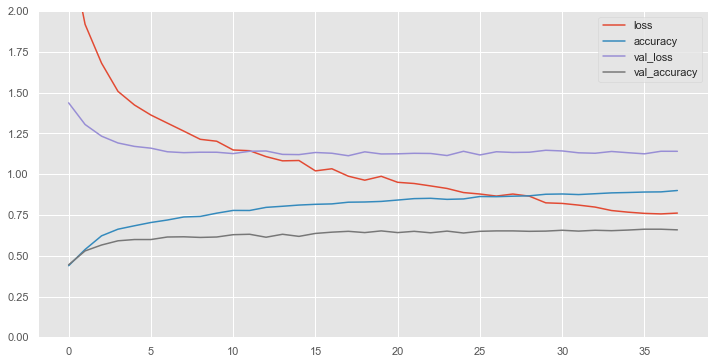

In [82]:
# Define chart of metrics
pd.DataFrame(history.history).plot(figsize=(12,6))
plt.grid(True)
plt.gca().set_ylim(0,2)
plt.show()

### - NLP Model Sequential (LSTM 02)

In [39]:
# Model Training dengan Menggunakan LSTM

model_lstm = Sequential()
model_lstm.add(text_vectorization)
model_lstm.add(embedding)
model_lstm.add(keras.layers.LSTM(27, kernel_regularizer=keras.regularizers.L2(), kernel_initializer=keras.initializers.he_normal(seed=1000), return_sequences=True, name = 'hidden_1'))
model_lstm.add(keras.layers.Activation('relu'))
model_lstm.add(keras.layers.Dropout(rate=0.2))
model_lstm.add(keras.layers.LSTM(9, kernel_regularizer=keras.regularizers.L2(), kernel_initializer=keras.initializers.he_normal(seed=1000), name = 'hidden_2'))
model_lstm.add(keras.layers.Activation('relu'))
model_lstm.add(keras.layers.Dropout(rate=0.2))
model_lstm.add(keras.layers.Dense(3, activation ='softmax', name = 'output'))

model_lstm.compile(loss = 'categorical_crossentropy',
                    optimizer = tf.keras.optimizers.Adamax(learning_rate=0.001, name="Adamax", epsilon=1e-07),
                    metrics = 'accuracy')

# Define the best epoc if learning rate is used
es_callback = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

# Model Training
history_lstm = model_lstm.fit(training_batches, epochs=50, validation_data=validation_batches,
                                # class_weight={0:7, 1:1, 2:2}, 
                                callbacks = [es_callback], verbose=1)

Epoch 1/50
104/104 [==============================] - 9s 27ms/step - loss: 2.7936 - accuracy: 0.5844 - val_loss: 2.0387 - val_accuracy: 0.5517
Epoch 2/50
104/104 [==============================] - 2s 15ms/step - loss: 1.6068 - accuracy: 0.5549 - val_loss: 1.3822 - val_accuracy: 0.5517
Epoch 3/50
104/104 [==============================] - 2s 16ms/step - loss: 1.1712 - accuracy: 0.5514 - val_loss: 1.1379 - val_accuracy: 0.5517
Epoch 4/50
104/104 [==============================] - 2s 16ms/step - loss: 0.9876 - accuracy: 0.5524 - val_loss: 1.0333 - val_accuracy: 0.5517
Epoch 5/50
104/104 [==============================] - 2s 16ms/step - loss: 0.8911 - accuracy: 0.6228 - val_loss: 0.9781 - val_accuracy: 0.5956
Epoch 6/50
104/104 [==============================] - 1s 14ms/step - loss: 0.8283 - accuracy: 0.6409 - val_loss: 0.9495 - val_accuracy: 0.5982
Epoch 7/50
104/104 [==============================] - 2s 16ms/step - loss: 0.7951 - accuracy: 0.6432 - val_loss: 0.9320 - val_accuracy: 0.5969

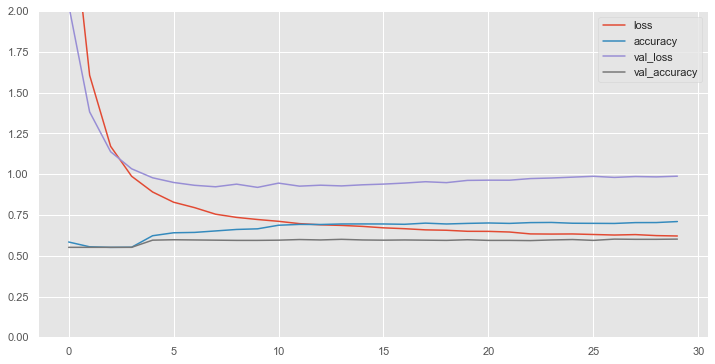

In [40]:
# Define chart of metrics
pd.DataFrame(history_lstm.history).plot(figsize=(12,6))
plt.grid(True)
plt.gca().set_ylim(0,2)
plt.show()

### - NLP Model Sequential (GRU 02)

In [41]:
# Model Training dengan Menggunakan GRU

model_gru = Sequential()
model_gru.add(text_vectorization)
model_gru.add(embedding)
model_gru.add(keras.layers.GRU(27, kernel_regularizer=keras.regularizers.L2(), kernel_initializer=keras.initializers.he_normal(seed=1000), return_sequences=True, name = 'hidden_1'))
model_gru.add(keras.layers.Activation('relu'))
model_gru.add(keras.layers.Dropout(rate=0.2))
model_gru.add(keras.layers.GRU(9, kernel_regularizer=keras.regularizers.L2(), kernel_initializer=keras.initializers.he_normal(seed=1000), name = 'hidden_2'))
model_gru.add(keras.layers.Activation('relu'))
model_gru.add(keras.layers.Dropout(rate=0.2))
model_gru.add(keras.layers.Dense(3, activation ='softmax', name = 'output'))

model_gru.compile(loss = 'categorical_crossentropy',
                    optimizer = tf.keras.optimizers.Adamax(learning_rate=0.001, name="Adamax", epsilon=1e-07),
                    metrics = 'accuracy')

# Define the best epoc if learning rate is used
es_callback = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

# Model Training
history_gru= model_gru.fit(training_batches, epochs=50, validation_data=validation_batches,
                                # class_weight={0:7, 1:1, 2:2}, 
                                callbacks = [es_callback], verbose=1)

Epoch 1/50
104/104 [==============================] - 6s 23ms/step - loss: 2.3386 - accuracy: 0.5970 - val_loss: 1.7941 - val_accuracy: 0.5517
Epoch 2/50
104/104 [==============================] - 1s 13ms/step - loss: 1.5035 - accuracy: 0.5970 - val_loss: 1.3325 - val_accuracy: 0.5517
Epoch 3/50
104/104 [==============================] - 1s 13ms/step - loss: 1.2036 - accuracy: 0.5970 - val_loss: 1.1444 - val_accuracy: 0.5517
Epoch 4/50
104/104 [==============================] - 1s 13ms/step - loss: 1.0640 - accuracy: 0.5970 - val_loss: 1.0624 - val_accuracy: 0.5517
Epoch 5/50
104/104 [==============================] - 1s 13ms/step - loss: 1.0114 - accuracy: 0.5970 - val_loss: 1.0210 - val_accuracy: 0.5517
Epoch 6/50
104/104 [==============================] - 1s 13ms/step - loss: 0.9787 - accuracy: 0.5970 - val_loss: 1.0003 - val_accuracy: 0.5517
Epoch 7/50
104/104 [==============================] - 1s 12ms/step - loss: 0.9606 - accuracy: 0.5970 - val_loss: 0.9881 - val_accuracy: 0.5517

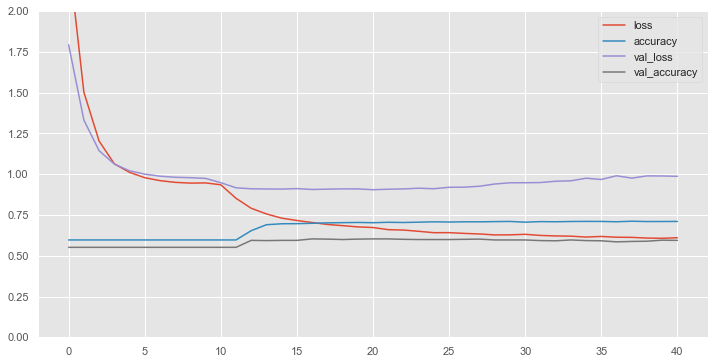

In [42]:
# Define chart of metrics
pd.DataFrame(history_gru.history).plot(figsize=(12,6))
plt.grid(True)
plt.gca().set_ylim(0,2)
plt.show()

## G3. Overall Evaluation

Dari hasil performa model, overall model dengan akurasi dan loss dengan konsisten terbaik (after diberikan pembobotan pada setiap class pada sentiment) adalah **model sequential pertama**... (01). Evaluasi akan dilakukan berdasarkan metrics `Confusion Metrix (classification_report)`.

In [59]:
# Predict Train and Test Label with the best model
y_pred_train = model.predict(X_train).round()
y_pred_test = model.predict(X_test).round()

classes_y_pred_train = np.argmax(y_pred_train,axis=1)
classes_y_pred_test= np.argmax(y_pred_test,axis=1)

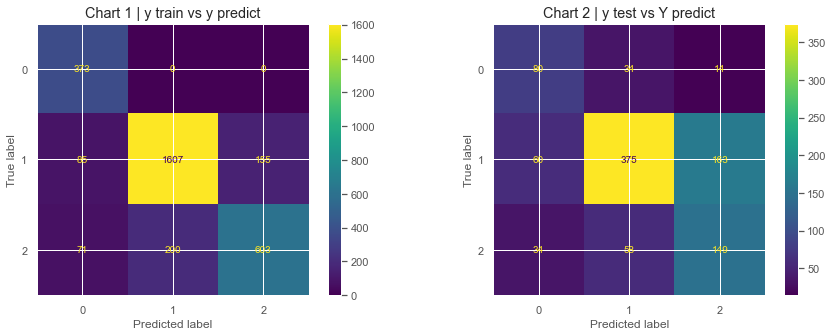

In [60]:
cm_train = confusion_matrix(y_train, classes_y_pred_train)
cm_test = confusion_matrix(y_test, classes_y_pred_test)

fig, ax = plt.subplots(1,2,figsize=(15,5))
ConfusionMatrixDisplay(confusion_matrix=cm_train).plot(ax=ax[0])
ax[0].set_title('Chart 1 | y train vs y predict')

ConfusionMatrixDisplay(confusion_matrix=cm_test).plot(ax=ax[1])
ax[1].set_title('Chart 2 | y test vs Y predict')

# set the spacing between subplots
plt.subplots_adjust(hspace=0.4)

plt.show()

In [61]:
# classification_report  =========== Train
print(classification_report(y_train, classes_y_pred_train))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       373
           1       0.89      0.87      0.88      1847
           2       0.80      0.69      0.74       874

    accuracy                           0.83      3094
   macro avg       0.80      0.85      0.82      3094
weighted avg       0.84      0.83      0.83      3094



In [62]:
# classification_report  ========== Test
print(classification_report(y_test, classes_y_pred_test))

              precision    recall  f1-score   support

           0       0.46      0.62      0.53       128
           1       0.80      0.63      0.70       598
           2       0.46      0.62      0.53       241

    accuracy                           0.62       967
   macro avg       0.57      0.62      0.59       967
weighted avg       0.67      0.62      0.64       967



Hasil evaluasi menunjukkan bahwa nilai f1 score overall masih underfit, baik pada train dan test (nilai f1 score masih dibawah 0.9). Namun hasil report ini masih lebih baik jika dibandingkan pada first trial saat model tidak diberikan pembobotan sama sekali. Hasil f1 score untuk masing-masing sentiment (0, 1, dan 2) sangat berbeda jauh. Hal ini terjadi karena effect dari imbalanced data. Adapun setelah diberikan bobot pada model (ketika proses training), nilai f1 score menjadi jauh lebih baik. Sebetulnya secara umum, f1 score pada label 0 (negative sentiment) dan 2 (positive) cukup penting untuk diperhatikan dan perlu menjadi concern untuk improvement model selanjutnya, karena kesalahan pada prediksi headline dapat membuat informasi sentiment menjadi misleading, khususnya bagi para pembaca dan CEO atau salesman dalam melihat optimisme bisnis. Jika prediksi sentiment positif berlebihan, maka efeknya adalah sentiment optimis yang berlebihan bagi pengambilan keputusan dan tanpa di sadari meningkatkan peluang resiko yang akan terjadi di masa depan (vise versa).

# H. Model Saving

In [47]:
# # Saving preprocess without model
pickle.dump(text_proses, open("text_proses.pkl", "wb"))

# # Saving model
model.save("model_finance")

INFO:tensorflow:Assets written to: model_finance\assets


# I. Inferencing

## I1. Load Model

In [48]:
# # Load All Files
with open('text_proses.pkl', 'rb') as file_1:
  text_proses = joblib.load(file_1)

## I2. Predict

In [49]:
# Mengaplikasikan Semua Teknik Preprocessing ke dalam Semua Documents
data_inf['headline_processed'] = data_inf['headline'].apply(lambda x: text_proses(x))
data_inf.head()

,sentiment,headline,headline_processed
0,neutral,Rimi supermarket is the key customer in Magist...,rimi supermarket key customer magistral center
1,positive,The representative body of Swedish Meats appro...,representative body swedish meat approved impr...
2,neutral,Finnish investment group Neomarkka Oyj HEL : N...,finnish investment group neomarkka nembv said ...
3,positive,The company reports a loss for the period of E...,company report loss period compared loss corre...
4,positive,Metso said it has won an order worth around 40...,metso said order worth around supply kraftline...


In [50]:
# Define clean data_inf
data_inf_preprocess = data_inf.headline_processed
data_inf_preprocess

0       rimi supermarket key customer magistral center
1    representative body swedish meat approved impr...
2    finnish investment group neomarkka nembv said ...
3    company report loss period compared loss corre...
4    metso said order worth around supply kraftline...
5    announced asolutions unit speed cooperation au...
6    mformation provides enhanced management applic...
7    telecomworldwire april tj group plc sell stake...
8    bank land acquired private banking business as...
9    looking forward contribute srv success compete...
Name: headline_processed, dtype: object

In [51]:
# # Predict using Linear Regression 
y_pred_inf = model.predict(data_inf_preprocess).round()
classes_y_pred_inf = np.argmax(y_pred_inf,axis=1)
classes_y_pred_inf

array([0, 0, 2, 0, 2, 1, 1, 2, 1, 1], dtype=int64)

In [52]:
# Create for loop for converting label into sentiment
sentiment_new = []

for i in classes_y_pred_inf:
    if i == 0:
        sentiment_new.append("negative")
    elif i == 1:
        sentiment_new.append("neutral")
    elif i == 2:
        sentiment_new.append("positive")

sentiment_new_pd = pd.DataFrame(sentiment_new, columns=['sentiment predict'])

# Concate between Inference-Set and Rating's Prediction
result = pd.concat([data_inf, sentiment_new_pd], axis=1)
result

,sentiment,headline,headline_processed,sentiment predict
0,neutral,Rimi supermarket is the key customer in Magist...,rimi supermarket key customer magistral center,negative
1,positive,The representative body of Swedish Meats appro...,representative body swedish meat approved impr...,negative
2,neutral,Finnish investment group Neomarkka Oyj HEL : N...,finnish investment group neomarkka nembv said ...,positive
3,positive,The company reports a loss for the period of E...,company report loss period compared loss corre...,negative
4,positive,Metso said it has won an order worth around 40...,metso said order worth around supply kraftline...,positive
5,neutral,He announced asolutions unit to speed cooperat...,announced asolutions unit speed cooperation au...,neutral
6,neutral,Mformation provides enhanced management of the...,mformation provides enhanced management applic...,neutral
7,neutral,TELECOMWORLDWIRE7 April 2006TJ Group Plc sells...,telecomworldwire april tj group plc sell stake...,positive
8,neutral,The Bank of +_land acquired the private bankin...,bank land acquired private banking business as...,neutral
9,positive,I am looking forward to contribute to SRV succ...,looking forward contribute srv success compete...,neutral


# K. Kesimpulan

**Overall EDA Analysis**

Based on objective pada case ini, yaitu `Membuat model sentiment dgn ANN pada dataset` **Sentiment Analysis for Financial News** sudah tercapai dengan cukup baik. Model has been created menggunakan NLP deep learning. Pada penggunaan dataset di case ini, pemilik dataset secara khusus memberikan case terkait headline beberapa berita yang berkaitan dengan financial headline news, which is quite impactful towards most business man and sales overall. Hasil dari visualisasi yang coba diproses pada EDA, memperlihatkan bahwa ada beberapa kata-kata yang secara frekuensi muncul paling sering (dengan sentiment tertentu), seperti company, profits, sales, finland, finnish, said, dll. Kata-kata tersebut bisa kita interpretasikan sebagai satu kesatuan sentimen yang sedang diperbincangkan dalam kondisi scope pada case headline ini. Untuk sentiment positif, maka secara intuitive kita bisa menyimpulkan bahwa kondisi ekonomi dan finance di negara finland atau finnish sedang dalam kondisi optimis karena terdapat lebih banyak sentimen positive pada kata profit, company, sales, net, dll dibandingkan dengan kata-kata yang sama ber-sentiment negative. Secara umum, if we are a business owner, CEO, director, or manager, maka tentu saja organisasi akan jauh lebih confidence & optimis dalam menghadapi tantangan bisnis kedepan melalui overall sentiment positive yang terdapat di berbagai dataset headline ini. Meskipun demikian, sentiment negative juga memiliki % dari total keseluruhan sentiment dan harus tetap menjadi concern semua pihak yang akan selalu terdampak kepada kondisi financial economi yang stabil.

**Overall Model Analysis**

Pada case ini, dibuat 3 buah model untuk uji performance. Model pertama adalah model sequence NLP base, model LSTM, dan model GRU. Adapun dari keseluruhan model, cukup sulit sebetulnya untuk menentukan model mana yang terbaik, namun after dilakukan report klasifikasi, maka diperoleh model NLP base (model pertama) adalah model yang setidaknya bisa kita asumsikan sebagai model paling baik dan konsisten di antara ketiga model. Dari hasil f1 score, overall performance sebetulnya masih jauh dari goodfit. Selain karena data sentimentnya imbalance, bisa juga karena jumlah dataset yang dimiliki masih belum cukup merepresentasikan kondisi financial vocab yang terjadi real di dunia jurnalis economic finance. Oleh karena itu, perlu dilakukan pembobotan pada model dengan mendefine `class_weight` pada setiap value sentiment. Dengan memberikan bobot, maka recall dan presisi untuk masing-masing sentiment akan menghasilkan nilai yang baik (presisi dan recall overall berdekatan valuenya).

Notes : LSTM dan GRU secara sederhana (tanpa pembobotan) menghasilkan loss dan accuracy yang hampir mirip satu sama lain, termasuk juga dengan base model (if return_sequences=True dituliskan pada hidden layer).

Dari hasil trial dan error, jumlah `hidden layer` dan `neuron` yang besar justru membuat model overfit dan mengandung loss yang sangat besar (misal, jumlah hidden layer > 4 dst, serta jumlah neuron 64, 128, dan neuron yang lebih besar dari itu). Oleh karena itu, decrease jumlah hidden layer serta neuron akan berefek pada accuracy dan -khususnya- loss yg lebih baik dan konsisten. Adapun dari hasil modeling, kombinasi `regularisasi` L2 dan he_normal juga digunakan untuk memberikan penalti pada model sehingga akurasi dan loss menjadi jauh lebih baik (gap accuracy dan loss train vs val cenderung menjadi lebih kecil). Adapun relu digunakan overall untuk proses activasi yang tidak dilakukan pada semua neuron di waktu yang sama, sehingga benefits pada saving computational cost and time.

Adapun pada saat beberapa kali trial, model masih sering menghasilkan model yang overfit (GAP antara accuracy train dan test masih terpatut cukup jauh > 0.3), demikian `dropout` kita berikan pada layer model agar hasil accuracy model cenderung menjadi lebih goodfit. Namun dengan memberikan dropout juga masih belum menghasilkan accuracy yang baik. Oleh karena itu, model optimasi dan improvement, baik dengan menggunakan `pipeline` (seperti shuffle, cache, dan prefetch) dan `adamax` (learning rate dan epsilon untuk optimasi bobot korekasi model) juga coba digunakan. Alhasil, secara cukup signifikan, hasil akurasi dan loss menjadi lebih baik dan konsisten. Efek explode pada metrics accuracy + loss menjadi tidak nampak pada chart, serta secara bertahap loss dan accuracy membaik secara lebih pasti (perubahan tiap epoch menjadi lebih stabil).

Adapun untuk mempercepat proses model training, maka digunakan `callback` dengan jumlah `epoch` yang proporsional. Jika hasil train tidak membaik dan menghasilkan performance yang slightly improve, maka callback (dan kombinasi `learning_rata` dan epoch) sangat membantu dalam mempercepat proses model training.

**Overall Analysis**


Secara umum, model masih underfit (meski sudah dilakukan beberapa skenario improvement dan optimization). Model Overall f1 score masih jauh dari goodfit (below < 0.9), baik itu hasil train dan test. Oleh karena itu, penambahan jumlah dataset (adding more data untuk mengurangi efek imbalanced dataset) bisa menjadi alternative dalam meningkatkan kualitas model. Text Preprocessing yang jauh lebih advance juga bisa dilakukan untuk mengurangi metrix sparce yang berefek kepada computational cost (speed & money) --- (contoh: removing lebih byk vocab yang bukan esensi). Skenario optimasi dan improvisasi model juga sebetulnya masih bisa dilakukan, khususnya mengingat dataset imbalanced, maka tuning pada class_weight yang lebih tepat juga masih bisa dilakukan. Serta tuning lebih detail lagi di learning_rate, epsilon, dll juga masih bisa dilakukan untuk mendapatkan hasil paling optimal.